# A - Importing and Filtering the News

In [1]:
# !pip install -U spacy
# !pip install -U spacy-transformers
#!python -m spacy download en_core_web_trf

In [ ]:
import pandas as pd
import spacy
import pickle

# Load the transformer model
nlp = spacy.load("en_core_web_trf")


file_path = '/Users/aakarshsurendra/Desktop/ROAD_NLP/Dataset/data_road.csv'

dataframe = pd.read_csv(file_path)


In [ ]:
!python -m spacy validate

In [4]:
dataframe = dataframe.head(50) # debug

# Functions

In [6]:
# Function to preprocess text using SpaCy
def preprocess_text_spacy(text):
    # Tokenize text and remove stopwords, punctuation, and lemmatize tokens
    doc = nlp(text)
    processed_tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return processed_tokens

# DO NOT RUN 

#### Run only once and store the output TF-IDF vector file as pickle - 

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Complete data (list of article texts)
article_texts = dataframe.content

# Handling NaN values by replacing them with empty strings
article_texts_cleaned = article_texts.fillna('')

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(tokenizer=preprocess_text_spacy)

# Fit and transform the data
tfidf_matrix = tfidf_vectorizer.fit_transform(article_texts_cleaned)

#### Exporting the pickle file

# Specify the file path where you want to save the TF-IDF matrix
file_path = "tfidf_matrix.pkl"

# Save the TF-IDF matrix to a file
with open(file_path, 'wb') as f:
    pickle.dump(tfidf_matrix, f)

/Users/aakarshsurendra/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


# Load Pickle

#### Importing the pickle file - Run this

In [5]:
# Specify the file path where the TF-IDF matrix is saved
file_path = "tfidf_matrix.pkl"

# Load the TF-IDF matrix from the file
with open(file_path, 'rb') as f:
    tfidf_matrix = pickle.load(f)

In [6]:
tfidf_matrix

<9978x55337 sparse matrix of type '<class 'numpy.float64'>'
	with 1027079 stored elements in Compressed Sparse Row format>

### Clustering - To remove the unrelated news

In [7]:
#Model 1
from sklearn.cluster import KMeans

# Initialize K-means clustering
num_clusters = 2  # You can adjust this based on the number of desired clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=18, random_state=42)

# Fit the clustering model
kmeans.fit(tfidf_matrix)

# Get the cluster labels
cluster_labels = kmeans.labels_

### PCA

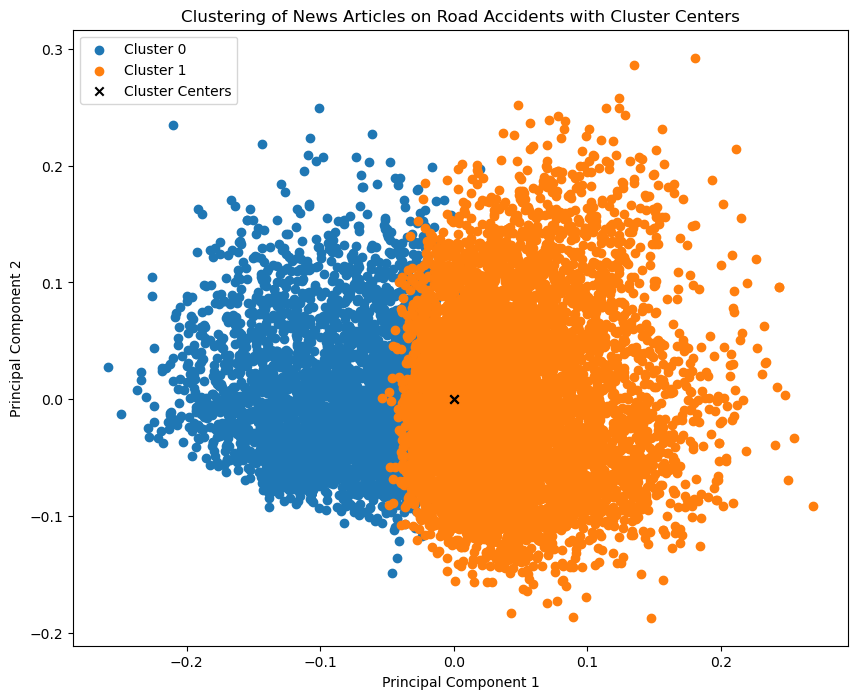

In [9]:
import numpy as np

# Get cluster centers from K-means model
cluster_centers = kmeans.cluster_centers_

# Visualize clusters with cluster centers
plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    plt.scatter(tfidf_matrix_2d[cluster_labels == cluster_label, 0],
                tfidf_matrix_2d[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='x', color='black', label='Cluster Centers')
plt.title('Clustering of News Articles on Road Accidents with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


### Cluster Extraction, Model Difference and Extracting the Unwanted News Dataset

In [12]:
Model1_cluster_0_points = [i for i in range(len(tfidf_matrix_2d)) if cluster_labels[i] == 0]
Model1_cluster_1_points = [i for i in range(len(tfidf_matrix_2d)) if cluster_labels[i] == 1]


# print("Cluster 0 points:", Model1_cluster_0_points)
# print("Cluster 1 points:", Model1_cluster_1_points)

In [13]:
set_Model0 = set(Model1_cluster_0_points)
set_Model1 = set(Model1_cluster_1_points)

# Find the elements that are in Model1_cluster_1_points but not in Model2_cluster_2_points
difference_Model0_Model1 = list(set_Model0.difference(set_Model1))

len(difference_Model0_Model1)

3254

In [14]:
import random
random_10_elements = random.sample(Model1_cluster_0_points, k=15)
print(random_10_elements)

[9750, 2189, 686, 7249, 2810, 2411, 6549, 1813, 2069, 1031, 426, 579, 5585, 962, 9120]


#### Verifying the unwanted news

In [15]:
import random

for index in random_10_elements:
    news_article = dataframe.loc[index, 'content']
    print(f"News Article {index}:\n{news_article}\n")

News Article 9750:
MADHYAMGRAM: A pleasure trip to Himachal Pradesh’s popular Shimla-Kullu-Manali circuit during Puja ended in tragedy for 10 tourists in Kolkata who met with an accident at Manali on Sunday, four days after they had started the journey together from Madhyamgram’s Nandankanan. The relatives of the 10 tourists from Madhyamgram, among whom a 28-year-old youth died and nine others suffered grievous injuries after their SUV plunged into a 100-metre gorge near Chaudah-Mor between Manali and Rohtang pass on Sunday morning, on Monday caught a flight and boarded a train to bring them back. Family members at the victim’s home in Chandpara The 10-member tourist team — couples Himanish Das(25) and Shampa Das (22) from Madhyamgram and Suman Das (31) and Tuktuki Das (23) from Barasat, and Subho Roy (25), Mithun Biswas (27), Salim Ali (24), Bubai Das (24), Prasanta Das (26) and Biswajit Das (28) from Madhyamgram, Sodepur and Gaighata — had started out on October 16. Gaighata resident

In [17]:
unwanted_news = dataframe.drop(Model1_cluster_1_points)
unwanted_news.to_csv('Unwanted_News.csv', index = False)

### Stage II Clustering

#### Vectorize the Unwanted News - DO NOT RUN THIS

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Complete data (list of article texts)
article_texts = unwanted_news.content

# Handling NaN values by replacing them with empty strings
unwanted_article_texts_cleaned = article_texts.fillna('')

# Initialize TF-IDF vectorizer
unwanted_tfidf_vectorizer = TfidfVectorizer(tokenizer=preprocess_text_spacy)

# Fit and transform the data
unwanted_tfidf_matrix = unwanted_tfidf_vectorizer.fit_transform(unwanted_article_texts_cleaned)

/Users/aakarshsurendra/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Exporting the pickle file - DO NOT RUN THIS

In [22]:
import pickle

# Specify the file path where you want to save the TF-IDF matrix
file_path = "unwanted_tfidf_matrix.pkl"

# Save the TF-IDF matrix to a file
with open(file_path, 'wb') as f:
    pickle.dump(unwanted_tfidf_matrix, f)

#### Importing the pickle file - RUN THIS

In [24]:
import pickle

# Specify the file path where the TF-IDF matrix is saved
file_path = "unwanted_tfidf_matrix.pkl"

# Load the TF-IDF matrix from the file
with open(file_path, 'rb') as f:
    unwanted_tfidf_matrix = pickle.load(f)

#### Clustering the unwanted news for clusters

In [47]:
from sklearn.cluster import KMeans

# Initialize K-means clustering
num_clusters = 2  # You can adjust this based on the number of desired clusters
# kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', n_init=15, random_state=42)

# Fit the clustering model
kmeans.fit(unwanted_tfidf_matrix)

# Get the cluster labels
cluster_labels = kmeans.labels_

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality to 2 dimensions using PCA
pca = PCA(n_components=2)
tfidf_matrix_2d = pca.fit_transform(unwanted_tfidf_matrix.toarray())


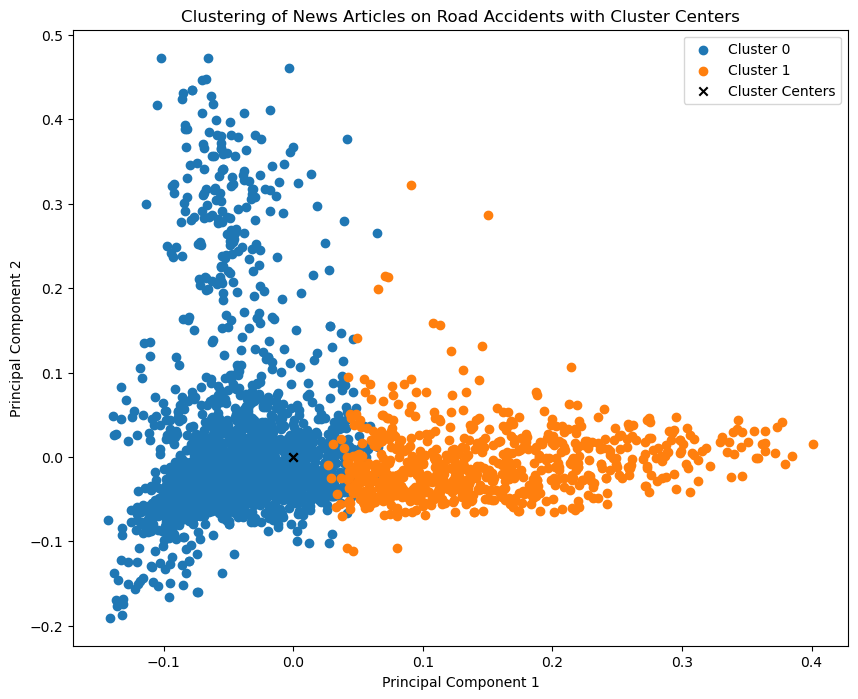

In [281]:
import numpy as np

# Get cluster centers from K-means model
cluster_centers = kmeans.cluster_centers_

# Visualize clusters with cluster centers
plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    plt.scatter(tfidf_matrix_2d[cluster_labels == cluster_label, 0],
                tfidf_matrix_2d[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='x', color='black', label='Cluster Centers')
plt.title('Clustering of News Articles on Road Accidents with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

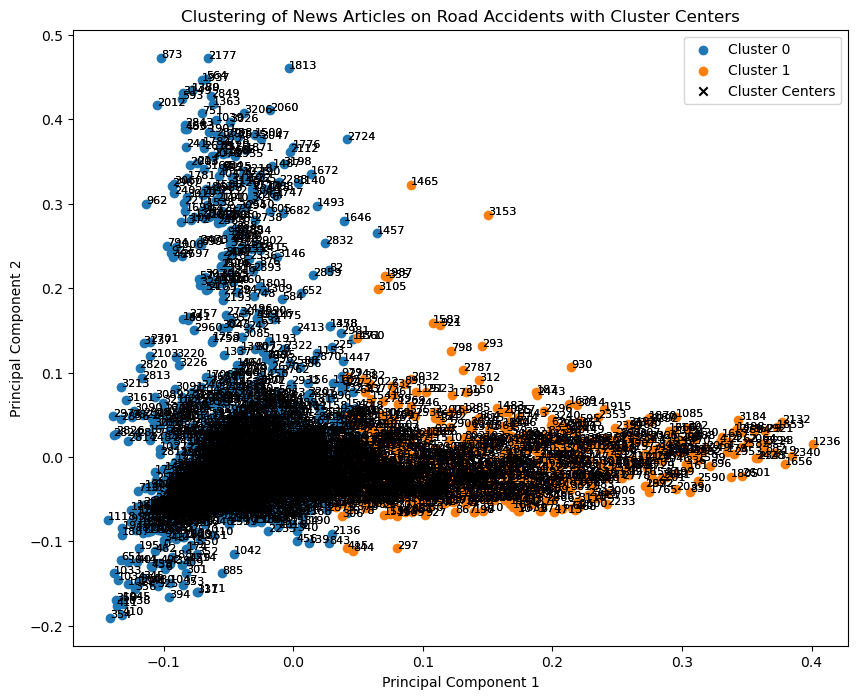

In [300]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store indexes for each cluster
unwanted_cluster_0_points = []
unwanted_cluster_1_points = []

unwanted_cluster_0_points = [index for index in np.where(cluster_labels == 0)[0] if index in unwanted_news.index]
unwanted_cluster_1_points = [index for index in np.where(cluster_labels == 1)[0] if index in unwanted_news.index]


# Get cluster centers from K-means model
cluster_centers = kmeans.cluster_centers_

# Visualize clusters with cluster centers
plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    cluster_indices = np.where(cluster_labels == cluster_label)[0]  # Get indices of data points in this cluster
    if cluster_label == 0:
        unwanted_cluster_0_points.extend(cluster_indices)  # Append indices to unwanted cluster 0 list
    elif cluster_label == 1:
        unwanted_cluster_1_points.extend(cluster_indices)  # Append indices to unwanted cluster 1 list
    
    plt.scatter(tfidf_matrix_2d[cluster_indices, 0],
                tfidf_matrix_2d[cluster_indices, 1],
                label=f'Cluster {cluster_label}')
    # Add labels to each point
    for i in range(len(tfidf_matrix_2d)):
        plt.text(tfidf_matrix_2d[i, 0], tfidf_matrix_2d[i, 1], str(i), fontsize=8)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='x', color='black', label='Cluster Centers')
plt.title('Clustering of News Articles on Road Accidents with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

# Now you can use unwanted_cluster_0_points and unwanted_cluster_1_points to access the indexes of data points in each cluster

In [310]:
import random
random_10_elements = random.sample(unwanted_cluster_1_points, k=15)
print(random_10_elements)

[2117, 1506, 3084, 936, 2601, 3156, 992, 2574, 154, 1123, 516, 1127, 1465, 631, 1823]


In [305]:
#Number of points we will retain, adding to Stage I Clustered Data
len(unwanted_cluster_1_points)

1058

In [311]:
import random

# Assuming random_10_elements is a list containing 10 random indexes
for index in random_10_elements:
    if index in unwanted_news.index:
        news_article = unwanted_news.loc[index, 'content']
        print(f"News Article {index}:\n{news_article}\n")

News Article 936:
NEW DELHI: Reacting to wicketkeeper Rishabh Pant 's horrific car accident, legendary cricketer Kapil Dev offered a word of advice to youngsters, saying, "You can easily afford a driver". Pant met with a near-fatal car crash on Friday morning. He was on his way to his hometown Roorkee from New Delhi and was driving his car. The 25-year-old Pant suffered serious injuries on forehead, a ligament tear on the knee, also hurt his right wrist, ankle, toe and suffered abrasion injuries on his back when his car collided with a road divider and caught fire on the Delhi-Dehradun highway. "This is learning. When I was still an up-and-coming cricketer, I faced a motorcycle accident. From that day onwards, my brother didn't even let me touch the motorbike. I'm just thankful to god that Rishabh Pant is safe," the 1983 World Cup winning captain said. "Yes, you have a good-looking car with great speeds but you have to be careful. You can easily afford a driver, you don't have to drive

#### Remove the unwanted News

In [60]:
#Filtered Dataset from Stage I Clustering
filtered_dataset_1 = dataframe.drop(Model1_cluster_0_points)

# Reset the index of the new DataFrame
filtered_dataset_1.reset_index(drop=True, inplace=True)

In [61]:
filtered_dataset_1.to_csv('Filtered_News_1.csv', index = False)

In [313]:
filtered_dataset_2 = unwanted_news.drop(unwanted_cluster_1_points)

# Reset the index of the new DataFrame
filtered_dataset_2.reset_index(drop=True, inplace=True)

KeyError: '[7, 18, 34, 38, 50, 56, 67, 113, 115, 122, 131, 132, 154, 176, 181, 204, 205, 206, 210, 214, 215, 216, 221, 222, 227, 229, 231, 251, 259, 270, 274, 279, 283, 285, 286, 297, 298, 299, 302, 303, 306, 308, 325, 329, 335, 336, 351, 355, 357, 358, 361, 364, 382, 390, 393, 408, 413, 423, 437, 442, 447, 450, 457, 461, 475, 477, 483, 489, 490, 495, 498, 501, 505, 517, 518, 519, 520, 523, 529, 530, 531, 534, 537, 543, 552, 574, 575, 580, 590, 591, 595, 607, 611, 619, 622, 623, 624, 625, 631, 647, 655, 657, 671, 672, 674, 685, 688, 692, 696, 702, 708, 726, 730, 731, 738, 741, 752, 753, 767, 782, 788, 791, 802, 817, 820, 822, 826, 830, 838, 844, 848, 849, 851, 853, 862, 863, 864, 867, 870, 877, 880, 882, 888, 908, 910, 920, 927, 931, 933, 937, 948, 951, 954, 955, 981, 985, 992, 996, 997, 1000, 1020, 1036, 1051, 1059, 1070, 1073, 1083, 1090, 1097, 1100, 1106, 1113, 1114, 1127, 1128, 1156, 1158, 1167, 1174, 1176, 1178, 1184, 1189, 1191, 1196, 1197, 1199, 1203, 1204, 1210, 1213, 1233, 1234, 1236, 1240, 1251, 1269, 1277, 1279, 1286, 1293, 1311, 1314, 1341, 1345, 1360, 1373, 1377, 1382, 1384, 1385, 1392, 1393, 1405, 1417, 1421, 1425, 1432, 1444, 1464, 1470, 1479, 1503, 1506, 1519, 1521, 1525, 1526, 1533, 1541, 1542, 1546, 1547, 1558, 1571, 1579, 1603, 1604, 1630, 1639, 1643, 1647, 1656, 1661, 1670, 1673, 1683, 1687, 1692, 1698, 1708, 1715, 1716, 1720, 1723, 1728, 1729, 1799, 1805, 1831, 1844, 1861, 1870, 1874, 1915, 1918, 1919, 1934, 1951, 1956, 1959, 1969, 1971, 1974, 1976, 1981, 1983, 1984, 1987, 1989, 1993, 1994, 2004, 2021, 2022, 2024, 2032, 2045, 2046, 2051, 2054, 2066, 2074, 2090, 2091, 2097, 2100, 2101, 2117, 2127, 2134, 2135, 2138, 2147, 2171, 2185, 2192, 2200, 2217, 2230, 2244, 2248, 2249, 2251, 2253, 2262, 2263, 2278, 2292, 2300, 2301, 2305, 2319, 2331, 2340, 2343, 2347, 2354, 2359, 2372, 2375, 2392, 2395, 2397, 2403, 2420, 2428, 2433, 2446, 2447, 2448, 2449, 2470, 2477, 2492, 2494, 2497, 2498, 2523, 2529, 2531, 2536, 2539, 2540, 2548, 2558, 2598, 2600, 2604, 2607, 2615, 2625, 2630, 2638, 2639, 2641, 2649, 2654, 2656, 2663, 2664, 2665, 2675, 2683, 2686, 2693, 2698, 2714, 2717, 2718, 2719, 2722, 2725, 2728, 2732, 2742, 2743, 2752, 2756, 2763, 2767, 2775, 2778, 2782, 2786, 2787, 2790, 2804, 2828, 2839, 2850, 2852, 2868, 2872, 2874, 2876, 2882, 2885, 2906, 2907, 2909, 2910, 2913, 2915, 2917, 2921, 2924, 2933, 2948, 2951, 2953, 2956, 2957, 2968, 2987, 2989, 2991, 2993, 3003, 3006, 3009, 3014, 3018, 3024, 3027, 3031, 3040, 3046, 3051, 3053, 3055, 3056, 3061, 3068, 3069, 3070, 3084, 3086, 3098, 3104, 3105, 3108, 3109, 3110, 3130, 3139, 3141, 3143, 3147, 3148, 3156, 3168, 3169, 3171, 3172, 3173, 3184, 3204, 3211, 3216, 3221, 3230, 3235, 3239, 3240, 3241, 3242, 3253] not found in axis'

In [257]:
filtered_dataset_2.to_csv('Filtered_News_2.csv', index = False)

NameError: name 'filtered_dataset_2' is not defined

In [119]:
filtered_dataset = pd.concat([filtered_dataset_1, filtered_dataset_2], ignore_index=True)
filtered_dataset.reset_index(drop=True, inplace=True)
filtered_dataset.to_csv('Filtered_News.csv', index = False)

### B - Extracting each Sent

In [16]:
df = pd.read_csv('Filtered_News_A.csv')

In [17]:
import spacy
def One_Liners(dataset):
    nlp = spacy.load("en_core_web_trf")
    extracted_text = []

    for content in dataset['content']:
        doc = nlp(content)
        lines = content.split('\n')
        found = False
        for line in lines:
            if ":" in line:
                first_line_after_colon = line.split(":", 1)[1].strip()
                text_till_period = first_line_after_colon.split(".")[0]
                extracted_text.append(text_till_period)
                found = True
                break

        if not found:
            # Take the first row if no colon is found
            extracted_text.append(content.split(".")[0])

    # Append the extracted text to the dataset with a new column named "First Line"
    dataset['First_Line'] = extracted_text

In [35]:
One_Liners(df)

### C - Pre-Processing - Vectorization

Pre-Processing

In [36]:
sentence = df.First_Line

In [37]:
df.head()

,Unnamed: 0,Link,content,News_date,First_Line
0,0,https://timesofindia.indiatimes.com/city/allah...,SULTANPUR : Three people lost their lives on F...,"Updated: Feb 23, 2024, 13:51 IST",Three people lost their lives on Friday in a c...
1,1,https://timesofindia.indiatimes.com/city/jaipu...,JAIPUR: Three people died in a car accident in...,"Updated: Feb 19, 2024, 15:48 IST",Three people died in a car accident in Rajasth...
2,2,https://timesofindia.indiatimes.com/city/benga...,RAICHUR: Two women killed and five others were...,"Updated: Feb 18, 2024, 11:34 IST",Two women killed and five others were seriousl...
3,3,https://timesofindia.indiatimes.com/city/delhi...,New Delhi: Two students were injured after a s...,"Feb 16, 2024, 08:12 IST",Two students were injured after a speeding car...
4,4,https://timesofindia.indiatimes.com/city/hyder...,"Hyderabad: A newlywed software engineer , his ...","Feb 22, 2024, 08:22 IST","A newlywed software engineer , his father-in-l..."


In [38]:
import nltk
import spacy
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

nlp = spacy.load("en_core_web_trf")

def preprocess(sentence):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(sentence.lower())

    # Lemmatize each word using spaCy
    lemmatized_tokens = []
    for token in nlp(sentence):
        if token.text.isalnum() and token.text not in stop_words:
            lemmatized_tokens.append(token.lemma_)

    sentence_p = " ".join(lemmatized_tokens)
    return sentence_p

df['first_line_l'] = df['First_Line'].apply(preprocess)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aakarshsurendra/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aakarshsurendra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [294]:
first_50_rows_first_line = df['first_line_l'].head(50)

In [295]:
# Define the output file path
output_file = 'first_line_l_text.txt'

# Open the output file in write mode
with open(output_file, 'w') as file:
    # Iterate over each element in the Series
    for sentence in first_50_rows_first_line:
        # Write the sentence to the file
        file.write(sentence + '\n')

print(f"Text file '{output_file}' has been created.")


Text file 'first_line_l_text.txt' has been created.


# D - Annotation

### Dividing Data for Team Members Annotation

In [83]:
annotation_1000 = filtered_dataset_1.head(1000)

In [19]:
dataset = pd.read_csv('dataset_First_Line.csv')

In [20]:
annotation_1000 = dataset.iloc[1000:2000,:]

In [21]:
annotation_1000.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Link', 'content', 'News_date',
       'First_Line'],
      dtype='object')

In [66]:
One_Liners(annotation_1000)

/var/folders/p7/m480s0s56rb3pl4d11ss4wch0000gn/T/ipykernel_2234/3172095247.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['First_Line'] = extracted_text


#### Craig's File for Annotation

In [22]:
craig_annotation3 = annotation_1000['First_Line'].iloc[0:100]

In [271]:
craig_annotation2 = annotation_1000['First_Line'].iloc[600:700]

In [24]:
# Define the output file path
output_file = 'craig_annotation3.txt'

# Open the output file in write mode
with open(output_file, 'w') as file:
    # Iterate over each element in the Series
    for sentence in craig_annotation3:
        # Write the sentence to the file
        file.write(sentence + '\n')

print(f"Text file '{output_file}' has been created.")


Text file 'craig_annotation3.txt' has been created.


#### Shirin's File for Annotation

In [25]:
shirin_annotation3 = annotation_1000['First_Line'].iloc[100:200]

In [273]:
shirin_annotation2 = annotation_1000['First_Line'].iloc[700:800]

In [26]:
# Define the output file path
output_file = 'shirin_annotation3.txt'

# Open the output file in write mode
with open(output_file, 'w') as file:
    # Iterate over each element in the Series
    for sentence in shirin_annotation3:
        # Write the sentence to the file
        file.write(sentence + '\n')

print(f"Text file '{output_file}' has been created.")


Text file 'shirin_annotation3.txt' has been created.


#### Gourav's File for Annotation

In [27]:
gourav_annotation3 = annotation_1000['First_Line'].iloc[200:300]

In [236]:
gourav_annotation2 = annotation_1000['First_Line'].iloc[500:600]

In [28]:
# Define the output file path
output_file = 'gourav_annotation3.txt'

# Open the output file in write mode
with open(output_file, 'w') as file:
    # Iterate over each element in the Series
    for sentence in gourav_annotation3:
        # Write the sentence to the file
        file.write(sentence + '\n')

print(f"Text file '{output_file}' has been created.")


Text file 'gourav_annotation3.txt' has been created.


#### Aakarsh's File for Annotation

In [29]:
aakarsh_annotation3 = annotation_1000['First_Line'].iloc[300:400]

In [275]:
aakarsh_annotation2 = annotation_1000['First_Line'].iloc[800:900]

In [30]:
# Define the output file path
output_file = 'aakarsh_annotation3.txt'

# Open the output file in write mode
with open(output_file, 'w') as file:
    # Iterate over each element in the Series
    for sentence in aakarsh_annotation3:
        # Write the sentence to the file
        file.write(sentence + '\n')

print(f"Text file '{output_file}' has been created.")

Text file 'aakarsh_annotation3.txt' has been created.


#### Pallavi's File for Annotation

In [31]:
pallavi_annotation3 = annotation_1000['First_Line'].iloc[400:500]

In [279]:
pallavi_annotation2 = annotation_1000['First_Line'].iloc[900:1000]

In [32]:
# Define the output file path
output_file = 'pallavi_annotation3.txt'

# Open the output file in write mode
with open(output_file, 'w') as file:
    # Iterate over each element in the Series
    for sentence in pallavi_annotation3:
        # Write the sentence to the file
        file.write(sentence + '\n')

print(f"Text file '{output_file}' has been created.")

Text file 'pallavi_annotation3.txt' has been created.


In [90]:
# Define the output file path
output_file = 'craig_test_annotation.txt'

# Open the output file in write mode
with open(output_file, 'w') as file:
    # Iterate over each element in the Series
    for sentence in craig_csv:
        # Write the sentence to the file
        file.write(sentence + '\n')

print(f"Text file '{output_file}' has been created.")

Text file 'craig_test_annotation.txt' has been created.


In [91]:
import json

# Specify the file path
file_path = "/Users/aakarshsurendra/Desktop/ROAD_NLP/Annotation/annotation_craig_nonlemma.json"


# Open the file and load its contents as JSON
with open(file_path, 'r') as file:
    data = json.load(file)
annotations = data.get("annotations", [])

## Consolidate the annotated data and format to required spaCy input

In [334]:
import json

# Specify the file path
file_path = "/Users/aakarshsurendra/Desktop/ROAD_NLP/Annotation/annotations.json"


# Open the file and load its contents as JSON
with open(file_path, 'r') as file:
    data = json.load(file)
annotations = data.get("annotations", [])

In [336]:
len(annotations)

1000

In [337]:
annotation_1000

,Unnamed: 0,Link,content,News_date,First_Line
0,0,https://timesofindia.indiatimes.com/city/allah...,SULTANPUR : Three people lost their lives on F...,"Updated: Feb 23, 2024, 13:51 IST",Three people lost their lives on Friday in a c...
1,1,https://timesofindia.indiatimes.com/city/jaipu...,JAIPUR: Three people died in a car accident in...,"Updated: Feb 19, 2024, 15:48 IST",Three people died in a car accident in Rajasth...
2,2,https://timesofindia.indiatimes.com/city/benga...,RAICHUR: Two women killed and five others were...,"Updated: Feb 18, 2024, 11:34 IST",Two women killed and five others were seriousl...
3,3,https://timesofindia.indiatimes.com/city/delhi...,New Delhi: Two students were injured after a s...,"Feb 16, 2024, 08:12 IST",Two students were injured after a speeding car...
4,4,https://timesofindia.indiatimes.com/city/hyder...,"Hyderabad: A newlywed software engineer , his ...","Feb 22, 2024, 08:22 IST","A newlywed software engineer , his father-in-l..."
...,...,...,...,...,...
995,1606,https://timesofindia.indiatimes.com/city/gurga...,GURGAON: A 28-year-old pedestrian died at a ho...,"Updated: Jul 5, 2023, 09:34 IST",A 28-year-old pedestrian died at a hospital af...
996,1607,https://timesofindia.indiatimes.com/city/gurga...,GURGAON: A luxury car caught fire and was almo...,"Updated: May 12, 2023, 12:08 IST",A luxury car caught fire and was almost comple...
997,1608,https://timesofindia.indiatimes.com/city/amara...,TIRUPATI: Six persons were killed in a ghastly...,"Jul 9, 2023, 19:42 IST",Six persons were killed in a ghastly road acci...
998,1609,https://timesofindia.indiatimes.com/city/goa/c...,VASCO : A speeding rental car rammed into two ...,"Updated: Aug 5, 2022, 08:06 IST",A speeding rental car rammed into two policeme...


In [339]:
# new_data = {'annotations': [annotations] * 100}
# new_df = pd.DataFrame(new_data)
# df_selected_50 = pd.concat([df_selected_50, new_df], ignore_index=True)
# df_selected_50

annotation_1000['annotations'] = annotations
annotation_1000

/var/folders/p7/m480s0s56rb3pl4d11ss4wch0000gn/T/ipykernel_2234/3370848657.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annotation_1000['annotations'] = annotations


,Unnamed: 0,Link,content,News_date,First_Line,annotations
0,0,https://timesofindia.indiatimes.com/city/allah...,SULTANPUR : Three people lost their lives on F...,"Updated: Feb 23, 2024, 13:51 IST",Three people lost their lives on Friday in a c...,[Three people lost their lives on Friday in a ...
1,1,https://timesofindia.indiatimes.com/city/jaipu...,JAIPUR: Three people died in a car accident in...,"Updated: Feb 19, 2024, 15:48 IST",Three people died in a car accident in Rajasth...,[Three people died in a car accident in Rajast...
2,2,https://timesofindia.indiatimes.com/city/benga...,RAICHUR: Two women killed and five others were...,"Updated: Feb 18, 2024, 11:34 IST",Two women killed and five others were seriousl...,[Two women killed and five others were serious...
3,3,https://timesofindia.indiatimes.com/city/delhi...,New Delhi: Two students were injured after a s...,"Feb 16, 2024, 08:12 IST",Two students were injured after a speeding car...,[Two students were injured after a speeding ca...
4,4,https://timesofindia.indiatimes.com/city/hyder...,"Hyderabad: A newlywed software engineer , his ...","Feb 22, 2024, 08:22 IST","A newlywed software engineer , his father-in-l...","[A newlywed software engineer , his father-in-..."
...,...,...,...,...,...,...
995,1606,https://timesofindia.indiatimes.com/city/gurga...,GURGAON: A 28-year-old pedestrian died at a ho...,"Updated: Jul 5, 2023, 09:34 IST",A 28-year-old pedestrian died at a hospital af...,[A 28-year-old pedestrian died at a hospital a...
996,1607,https://timesofindia.indiatimes.com/city/gurga...,GURGAON: A luxury car caught fire and was almo...,"Updated: May 12, 2023, 12:08 IST",A luxury car caught fire and was almost comple...,[A luxury car caught fire and was almost compl...
997,1608,https://timesofindia.indiatimes.com/city/amara...,TIRUPATI: Six persons were killed in a ghastly...,"Jul 9, 2023, 19:42 IST",Six persons were killed in a ghastly road acci...,None
998,1609,https://timesofindia.indiatimes.com/city/goa/c...,VASCO : A speeding rental car rammed into two ...,"Updated: Aug 5, 2022, 08:06 IST",A speeding rental car rammed into two policeme...,[A speeding rental car rammed into two policem...


In [340]:
annotation_1000.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1000 non-null   int64 
 1   Link         1000 non-null   object
 2   content      1000 non-null   object
 3   News_date    1000 non-null   object
 4   First_Line   1000 non-null   object
 5   annotations  961 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [201]:
N = 100
annotation_500 = pd.concat([annotation_500] * N, ignore_index=True)

In [203]:
annotation_500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   50000 non-null  int64 
 1   Link         50000 non-null  object
 2   content      50000 non-null  object
 3   News_date    50000 non-null  object
 4   annotations  48800 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.9+ MB


# E - Model Building


In [204]:
annotation_500 = annotation_500[annotation_500['annotations'] != 'None']

In [205]:
annotation_500.isna().sum()

Unnamed: 0        0
Link              0
content           0
News_date         0
annotations    1200
dtype: int64

In [206]:
train_data = annotation_500['annotations'][:40000].tolist()
test_data = annotation_500['annotations'][40000:].tolist()

In [207]:
entity_names = ["AGE", "VEHICLE TYPE", "REASON", "FATALITIES", "INJURED", "GENDER", "TIME"]

train_data = craig_csv.get('annotations')  # Retrieve 'annotations' from 'data'
if train_data is not None:  # Check if 'train_data' is not None
    train_data = [tuple(i) for i in train_data if i is not None]  # Convert 'train_data' to list of tuples, excluding any None values
    # Further processing if needed
else:
    print("Annotations data is not available or is None.")
    
test_data = craig_csv.get('annotations')  # Retrieve 'annotations' from 'data'
if test_data is not None:  # Check if 'test_data' is not None
    test_data = [tuple(i) for i in test_data if i is not None]  # Convert 'test_data' to list of tuples, excluding any None values
    # Further processing if needed
else:
    print("Annotations data is not available or is None.")

In [208]:
for i in train_data:
    if i[1]['entities'] == []:
        i[1]['entities'] = [(0, 0, name) for name in entity_names]
    else:
        i[1]['entities'] = [tuple(entity) for entity in i[1]['entities']]
for i in test_data:
    if i[1]['entities'] == []:
        i[1]['entities'] = [(0, 0, name) for name in entity_names]
    else:
        i[1]['entities'] = [tuple(entity) for entity in i[1]['entities']]

In [ ]:
train_data

In [210]:
annotation_500.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   50000 non-null  int64 
 1   Link         50000 non-null  object
 2   content      50000 non-null  object
 3   News_date    50000 non-null  object
 4   annotations  48800 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.3+ MB


In [211]:
annotation_500.to_csv('annotation_500.csv')

In [212]:
from spacy.tokens import DocBin
nlp = spacy.blank("en") # load a new spacy model
db = DocBin() # create a DocBin object

In [213]:
for text, annot in train_data:
    if annot is None:
        print("Skipping text with None annotations.")
        continue
    doc = nlp.make_doc(text)
    ents = []
    if "entities" not in annot:
        print("Skipping text with missing 'entities' key in annotations.")
        continue
    for start, end, label in annot["entities"]:
        span = doc.char_span(start, end, label=label, alignment_mode="contract")
        if span is None:
            print("Skipping entity")
        else:
            ents.append(span)

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping

In [214]:
for data in train_data:
    if data is None:
        print("Encountered a null value in train_data. Skipping...")
        continue
    
    text, annot = data
    doc = nlp.make_doc(text)
    ents = []

    if annot is not None and "entities" in annot:  # Check if annot is not None and contains "entities" key
        for start, end, label in annot["entities"]:
            span = doc.char_span(start, end, label=label, alignment_mode="contract")
            if span is None:
                print("Skipping entity")
            else:
                ents.append(span)

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping

In [215]:
doc.ents = ents # label the text with the ents
db.add(doc)

db.to_disk("/Users/aakarshsurendra/Desktop/ROAD_NLP/train.spacy") # save the docbin object

In [216]:
nlp2 = spacy.blank("en")
db2 = DocBin()

In [217]:
for text, annot in test_data: # data in spacy tuple
        doc2 = nlp2.make_doc(text) # create doc object from text
        ents2 = []
        for start, end, label in annot["entities"]: # add character indexes
            span = doc2.char_span(start, end, label=label, alignment_mode="contract")
            if span is None:
                print("Skipping entity")
            else:
                ents2.append(span)

Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping entity
Skipping

In [218]:
doc2.ents = ents2 # label the text with the ents
db2.add(doc2)

db2.to_disk("/Users/aakarshsurendra/Desktop/ROAD_NLP/test.spacy") # save the docbin object

In [238]:
!python -m spacy init fill-config base_config.cfg config.cfg #open and include train and test file paths

✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [325]:
!python -m spacy train config.cfg --output /Users/aakarshsurendra/Desktop/ROAD_NLP/output --paths.train /Users/aakarshsurendra/Desktop/ROAD_NLP/train.spacy --paths.dev /Users/aakarshsurendra/Desktop/ROAD_NLP/test.spacy

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
ℹ Saving to output directory:
/Users/aakarshsurendra/Desktop/ROAD_NLP/output
ℹ Using CPU
ℹ To switch to GPU 0, use the option: --gpu-id 0

=========================== Initializing pipeline ===========================
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/Users/aakarshsurendra/anaconda3/lib/python3.11/site-packages/spacy/__main__.py", line 4, in <module>
    setup_cli()
  File "/Users/aakarshsurendra/anaconda3/lib/python3.11/site-packages/spacy/cli/_util.py", line 87, in setup_cli
    command(prog_name=COMMAND)
  File "/Users/aakarshsurendra/anaconda3/lib/pyth

In [314]:
import spacy
test_nlp = spacy.load('/Users/aakarshsurendra/Desktop/ROAD_NLP/output/model-best')

In [315]:
test_nlp.get_pipe('ner').labels

('AGE', 'REASON', 'VEHICLE TYPE')

In [316]:
test = 'A 64-year-old Nepean Sea Road resident was sentenced to three months simple imprisonment after his speeding car hit a man crossing the road at PDP Signal on Malabar Hill , with the magistrates court observing that when a residential area is crowded and there is a turning, a driver is expected to slow down to a reasonable speed'

In [317]:
doc = test_nlp(test)

In [318]:
spacy.displacy.render(doc, style="ent", jupyter=True)

### F

In [174]:
import gensim.downloader as api
model = api.load('word2vec-google-news-300')

In [175]:
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import gensim.downloader as api
import nltk
import pandas as pd
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aakarshsurendra/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [176]:
# Define function to get word vectors
def get_word_vectors(sentence, model):
    processed_sentence = preprocess(sentence)
    word_vectors = []
    for word in processed_sentence:
        if word in model:
            word_vector = model[word]
            word_vectors.append(word_vector)
    return word_vectors

# Define function to get sentence vector
def get_sent_vectors(sentence, model):
    word_vectors = get_word_vectors(sentence, model)
    if len(word_vectors) > 0:
        sentence_vector_mean = np.mean(word_vectors, axis=0)
        return sentence_vector_mean
    else:
        return None

In [177]:
df['first_line_v'] = df['first_line_l'].apply(get_sent_vectors, model=model)

In [178]:
df.head(3)

,Unnamed: 0,Link,content,News_date,First_Line,first_line_l,first_line_v
0,0,https://timesofindia.indiatimes.com/city/allah...,SULTANPUR : Three people lost their lives on F...,"Updated: Feb 23, 2024, 13:51 IST",Three people lost their lives on Friday in a c...,three people lose life Friday car accident Pur...,"[-0.1507108, 0.124925956, 0.0069990316, 0.1357..."
1,1,https://timesofindia.indiatimes.com/city/jaipu...,JAIPUR: Three people died in a car accident in...,"Updated: Feb 19, 2024, 15:48 IST",Three people died in a car accident in Rajasth...,three people die car accident Rajasthan Anupga...,"[-0.17868602, 0.12452791, -0.020058146, 0.1550..."
2,2,https://timesofindia.indiatimes.com/city/benga...,RAICHUR: Two women killed and five others were...,"Updated: Feb 18, 2024, 11:34 IST",Two women killed and five others were seriousl...,two woman kill five other seriously hurt car b...,"[-0.17456767, 0.09361267, 0.019272868, 0.11790..."


# Backup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get cluster centers from K-means model
cluster_centers = kmeans.cluster_centers_

# Visualize clusters with cluster centers
plt.figure(figsize=(10, 8))
for cluster_label in range(num_clusters):
    plt.scatter(tfidf_matrix_2d[cluster_labels == cluster_label, 0],
                tfidf_matrix_2d[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label}')
    # Add labels to each point
    for i in range(len(tfidf_matrix_2d)):
        plt.text(tfidf_matrix_2d[i, 0], tfidf_matrix_2d[i, 1], str(i), fontsize=8)

plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
            marker='x', color='black', label='Cluster Centers')
plt.title('Clustering of News Articles on Road Accidents with Cluster Centers')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()